# Visualisierung von Daten in Python

In Python gibt es mittlerweile eine ganze Reihe von Bibliotheken um Daten zu visualisieren.
Wir werden uns hier **matplotlib**, **seaborn** und die direkten Visualisierungsmethoden von **pandas** ansehen.
Die beiden Letztgenannten basieren auf matplotlib und sind High-Level-Interfaces.

### Merkmalsarten

Wir werden sehen, dass sich je nach Merkmalsart unterschiedliche Graphiktypen anbieten.
Man unterscheidet zunächst zwischen kategorialen und numerischen Merkmalen. Diese werden wiederum in Untertypen unterteilt:

- kategoriale Merkmale:
    - nominale Merkmale: ohne intrinsischer Sortierung (Bsp: Geburtsort [Aschaffenburg, Hanau, ...], Studienfach [Software Design, Mechatronik, ...])
    - ordinale Merkmale: mit intrinsischer Sortierung (Bsp: T-Shirt-Größen [XS < S < M < L < XL], Wochentage [Montag < Dienstag < ...])
- metrische Merkmale:
    - diskrete Merkmale: nur endlich (oder abzählbar unendlich) viele mögliche Ausprägungen (Bsp: Anzahl Geschwister [0, 1, 2, ...], Anzahl Vorlesungsteilnehmer)
    - stetige Merkmale: überabzählbar unendlich viele mögliche Ausprägungen, d.h. beliebige Zwischenwerte möglich (Bsp: Körpergröße [174.583cm], Temperaturen)

## Matplotlib

Gute Quellen:
- https://matplotlib.org/stable/users/explain/quick_start.html
- https://matplotlib.org/cheatsheets/
- https://matplotlib.org/stable/gallery/index.html
- https://www.python-graph-gallery.com/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib unterscheidet zwischen `Figure` (der gesamten Zeichenfläche) und `Axes` (ein Teil der Zeichenfläche mit Koordinatensystem).
Eine Figure kann auch mehrere Axes enthalten.
In den Axes trägt man die eigentlichen Daten ein.
(Vorsicht Unterschied: Die x- bzw. y-Achse (oder z-Achse) einer Graphik heisen `Axis`.)

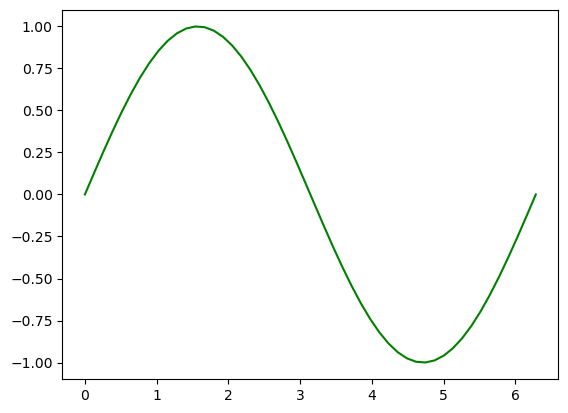

In [19]:
'''
#alte Matlabplot variante
x =  np.linspace(0, 2*np.pi,50) #damit kann man das in 50 gleiche Schritte unterteilen
y = np.sin(x)

plt.plot(x,y, color= "green") # das alleine zeigt den Graph aber leider mit irgendeiner überflüssiger cmd-Zeile
plt.show() #sorgt dafür das der jetzige "plot" sauber angezeigt wird
######
'''
x =  np.linspace(0, 2*np.pi,50) #damit kann man das in 50 gleiche Schritte unterteilen
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x,y, color= "green") # das alleine zeigt den Graph aber leider mit irgendeiner überflüssiger cmd-Zeile
plt.show() #sorgt dafür das der jetzige "plot" sauber angezeigt wird

Die Aufteilung einer Matplotlib-Graphik in Figure, Axes und die diversen Subelemente einer Axes ist am besten im Bild zu erkennen:

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="Struktur einer Matplotlib-Graphik" width="400"/>

Der relativ übersichtliche Datensatz *tips* enthält alle oben genannten Merkmalsarten.
Er dient uns als Beispiel in diesem Tutorial.

In [14]:
tips =pd.read_csv("tips.csv")


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Eine erste typische Matplotlib-Graphik:

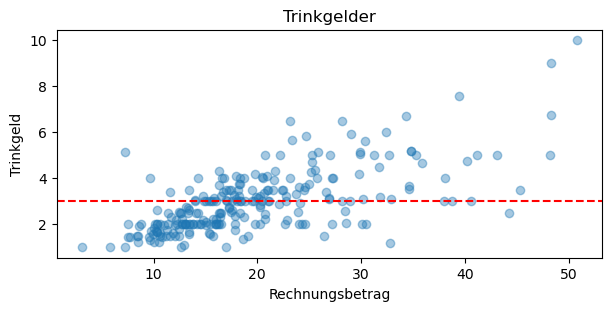

In [29]:
fig, ax = plt.subplots(figsize= (6,3), layout = "constrained") ## Sorgt für Seitenanpassung bei der Bild ausgabe

ax.scatter(x = tips["total_bill"], y = tips ["tip"], alpha= 0.4)
ax.axhline(y = tips["tip"].mean(), color = "r", linestyle = "--") # durchschnittliches Trinkgeld
ax.set_xlabel("Rechnungsbetrag")
ax.set_ylabel("Trinkgeld")
ax.set_title("Trinkgelder")

plt.show()

Die Plots lassen sich **nahezu beliebig** modifizieren. 
So lassen sich Farben, Größen, Marierungsstil, Linienbreiten, Linienstil und vieles mehr auf diverse Arten anpassen.

In [30]:
fig.savefig("tips_figure2.png")

Es gibt grundsätzlich zwei mögliche Wege Matplotlib zu bedienen:
 - objektorientierte API
 - prozedurale pyplot-API (Hiervon wird üblicherweise abgeraten.)

In den obigen Beispielen haben wir die objektorientierte API verwendet.

Das prozedurale Pyplot-Interface ist historisch an die Plotfunktionen von MATLAB angelehnt. Darin werden Figure und Axes implizit gehandhabt und immer nur deren Status aktualisiert. **Allgemein wird eher das objektorientierte Inferface empfohlen.**

### Histogramme

Zunächst wollen wir die Verteilung der Rechnungsbeträge betrachten.
Zur Visualisierung eindimensionaler numerischer Daten eignen sich Histogramme.
Daran kann man auf einen Blick die Extremwerte und Häufungsbereiche erkennen.

### Barplots (Säulen- bzw. Balkendiagramme)

Wir möchten auszählen, wie oft die einzelnen Wochentage im Datensatz vorkommen.
Für eindimensionale kategoriale Merkmale eignen sich oft Barplots.
Im Falle von ordinalen Merkmalen sollte man ggf. die intrinsische Reihenfolge der Ausprägungen beachten.

Nun möchten wir innerhalb der Wochentage zusätzlich noch nach Geschlecht aufteilen und die durchschnittlichen Trinkgelder darstellen.
Wir müssen also zwei kategoriale Merkmale gleichzeitig betrachten.
Hierfür eignen sich - je nach Fokus - gestapelte oder gruppierte Barcharts.

### Scatterplots (Streudiagramme)

Zweidimensionale metrische Merkmale lassen sich gut in einem Streudiagramm darstellen.
Variiert man auch die Farbe, Größe oder das Markierungssymbol, so kann man auch weitere Aspekte (Dimensionen) leicht visualisieren.

Hier wollen wir für jeweils das Trinkgeld gegen den Rechnungsbetrag auftragen und farblich nach Mittagessen bzw. Abendessen unterscheiden.
Da in dichten Bereichen viel Information durch Überplotten verloren geht, kann man beispielsweise die Farbsättigung reduzieren.

Mit Barplots, Histogrammen und Scatterplots kommt man in der Praxis schon erstaunlich weit.
Die Vielfalt an möglichen Visualisierungen ist jedoch riesig und es ist ratsam diese etwas zu erkunden.
Inspirationen und Code-Beispiele findet man beispielsweise unter https://matplotlib.org/stable/gallery/index.html oder https://www.python-graph-gallery.com.

## Seaborn

- Tutorial: https://seaborn.pydata.org/tutorial.html
- Beispiele: https://seaborn.pydata.org/examples/index.html

Seaborn ist ein Visualisierungsbibliothek, die auf Matplotlib aufsetzt und gut mit Pandas zusammenspielt.
Während man mit Matplotlib beliebig komplizierte Graphiken zusammenbauen kann, hat Seaborn das Ziel ein High-Level-Interface zur Verfügung zu stellen um auf möglichst einfache Art die statistischen Zusammenhänge verschiedener Merkmale darzustellen.

Seaborn kennt drei übergeordnete Hauptfunktionen um jeweils eine Reihe von Graphiken zu ermöglichen:
- `relplot()` (relational): scatterplot, lineplot
- `displot()` (distributions): histplot, kdeplot, ecdfplot, rugplot
- `catplot()` (categorical): stripplot, swarmplot, boxplot, violinplot, pointplot, barplot

Die erstgenannten Hauptfunktionen sind Figure-Level-Funktionen. Sie rufen intern eine der jeweils nachgenannten Axes-Level-Funktionen auf, was man über das Argument *kind* steuern kann. (Beispiel: `relplot` nutzt standardmäßig scatterplot, d.h. `kind="scatter"`, und mittels `kind="line"` könnte man einen Linienplot erzeugen). Man kann aber auch direkt mit den Axes-Level-Funktionen (z.B. `sns.lineplot()`) arbeiten.

Zusätzlich zu diesen Hauptfunktionen gibt es auch noch `jointplot()` und `pairplot()`, welche anders funktionieren.

Es lassen sich aber auch alle Aspekte einer Graphik beliebig anpassen.
Zu beachten ist dabei, dass Figure-Level-Funktionen (d.h. `relplot`, `displot` und `catplot`) ihre Figure selbst verwalten.
Grundsätzlich geben diese Funktionen ein `FacetGrid` zurück, welches etliche Methoden bietet um Aspekte anzupassen.
Hierin ist jedoch auch der direkte Zugriff auf die klassichen Matplotlib-Objekte, d.h. Figure und Axes, möglich.


Anstatt mit den Figure-Level-Funktionen kann man auch direkt mit den spezifischeren Axes-Level-Funktionen arbeiten. 
Besonders wenn man mehrere Axes kombiniert, kann dies nützlich sein.

## Pandas

Auch die Bibliothek Pandas bringt einige elementare Visualisierungsfunktionen mit, die intern auf Matplotlib aufsetzen.
Die resultierenden Graphiken mögen nicht direkt Publikationsqualität haben, aber es ist ungemein handlich, während des Data Wranglings spontan etwas plotten zu können.
Sowohl für DataFrames als auch für Series findet man unter `.plot.*` eine Reihe praktischer Plot-Funktionen.

Details unter https://pandas.pydata.org/docs/user_guide/visualization.html